In [ ]:
from cs103 import *


# CPSC 103 - Systematic Program Design
# Module 08 Day 2
Ian Mitchell, with thanks to Rik Blok, Jessica Wong, and Giulia Toti

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker check-in
How are you feeling about creating graphs / figures / plots?

<!-- formatting: add two spaces at end of line to force linebreak -->
  A. 💪 Easy-peasy... you can go faster  
  B. 👍 Yup, I got this  
  C. 😕 I might have missed a bit here or there  
  D. 😟 Hmm, something's not working right  
  E. 😵 I have no idea what's going on  

---

# Reminders

- No tutorial resubmission for module 7 (HtDAP).
- No tutorial at all for module 8 (visualization).
- Wed - Fri: Tutorial sections are optional (no attendance taken).  Get help on your project.
- Friday:
  - If you **wrote** the midterm: Deadline to review your midterm in Gradescope to receive participation points.
  - If you **did not write** the midterm: Deadline to submit the midterm worksheet.
  - Deadline to submit midterm regrade requests through Gradescope.  Download [midterm-exam-results.html](https://canvas.ubc.ca/courses/147818/files/36217340/download?download_frd=1) or [midterm-exam-results.ipynb](https://canvas.ubc.ca/courses/147818/files/36361914/download?download_frd=1) for guidance on how to (and how **not** to) submit a regrade request.
- **next** Monday: Module 8 (Visualization) worksheet due.
- **next** Tuesday & Thursday: Lecture sections are open office hours for help with the project and/or preparation for the final exam.
- **next** Wed - Fri: Tutorial sections are optional (no attendance taken).  Get help on your project and/or final exam preparation.
- **next** Friday:
  - [Project final submission](https://canvas.ubc.ca/courses/147818/assignments/1966017) due.
  - [Project demo](https://canvas.ubc.ca/courses/147818/assignments/1966016) due.
- **Tuesday December 10, noon - 2:30 pm**: Final exam in Student Rec Centre.
- **All deadlines are at noon**.  Late submissions incur an 8% penalty per hour after that.
- Do not leave online submission until the last minute.  Jupyter can become slow and/or unresponsive as the deadline approaches and the demand grows.  Submit early and often.

See your Canvas calendar (https://canvas.ubc.ca/calendar) for details.

### A Few Useful Things

- Matplotlib / pyplot:
  - The [current version of the beginner pyplot tutorial](https://matplotlib.org/stable/tutorials/pyplot.html), which is essentially the same as the old version except (a) it adds a section on how to use a categorical variable as your independent (horizontal) variable and (b) it is formatted a bit more nicely.
  - The [summary of pyplot functions](https://matplotlib.org/stable/api/pyplot_summary.html) can be useful when you want to manipulate your plots in some way.
  - **Keep your plot simple** for the CPSC 103 project.  You can play with the pretty features available in Matplotlib in the future.
- Not happy with your midterm result?  Review the slides on [how to improve your performance in a course](https://canvas.ubc.ca/courses/147818/files/34572624?wrap=1) from October 8 lecture.  You could also re-watch the corresponding part of [the recorded lecture from October 8](https://ubc.ca.panopto.com/Panopto/Pages/Viewer.aspx?id=bb46385b-6aca-41c4-a824-b1da0107ea54) (starts at about 1:05:50 into the lecture).
- **If you are feeling distressed or overwhelmed then reach out and talk to somebody!** UBC has extensive resources listed on the student health page https://students.ubc.ca/health.  Use them!

---

# `pyplot` from Matplotlib library

In order to use `pyplot`, we first have to import it:

In [ ]:
import matplotlib.pyplot as pyplot


# Exercise 1: Analysing VPD Crime Data

## Step 1: Planning - **Highlights**

### Step 1a: Identify the info your program will read

<font color="blue">
    
- TYPE: The type of crime activities.  One of
  - BNE Commercial
  - BNE Residential/Other
  - Theft of Vehicle
  - Theft of Bicycle
- HOUR,MINUTE: when the reported crime activity occurred
  - HOUR: A two-digit field that indicates the hour time (in 24 hours format)
  - MINUTE: A two-digit field that indicates the minute
  - **Note: Some crimes may not contain time information.**

</font>

### Step 1b: Write a description of what your program will produce

<font color="blue">
    
- Given a type of crime, find the time of day (hour) with the highest frequency
    
OR
    
- Draw a graph of crimes committed in each hour, maybe show different types overlaid in different colours

</font>

### Step 1c: Write or draw examples of what your program will produce

<font color="blue">
    
```python
expect(main('crime_data_file.csv', CrimeType.BEC), 8)
```

OR
    
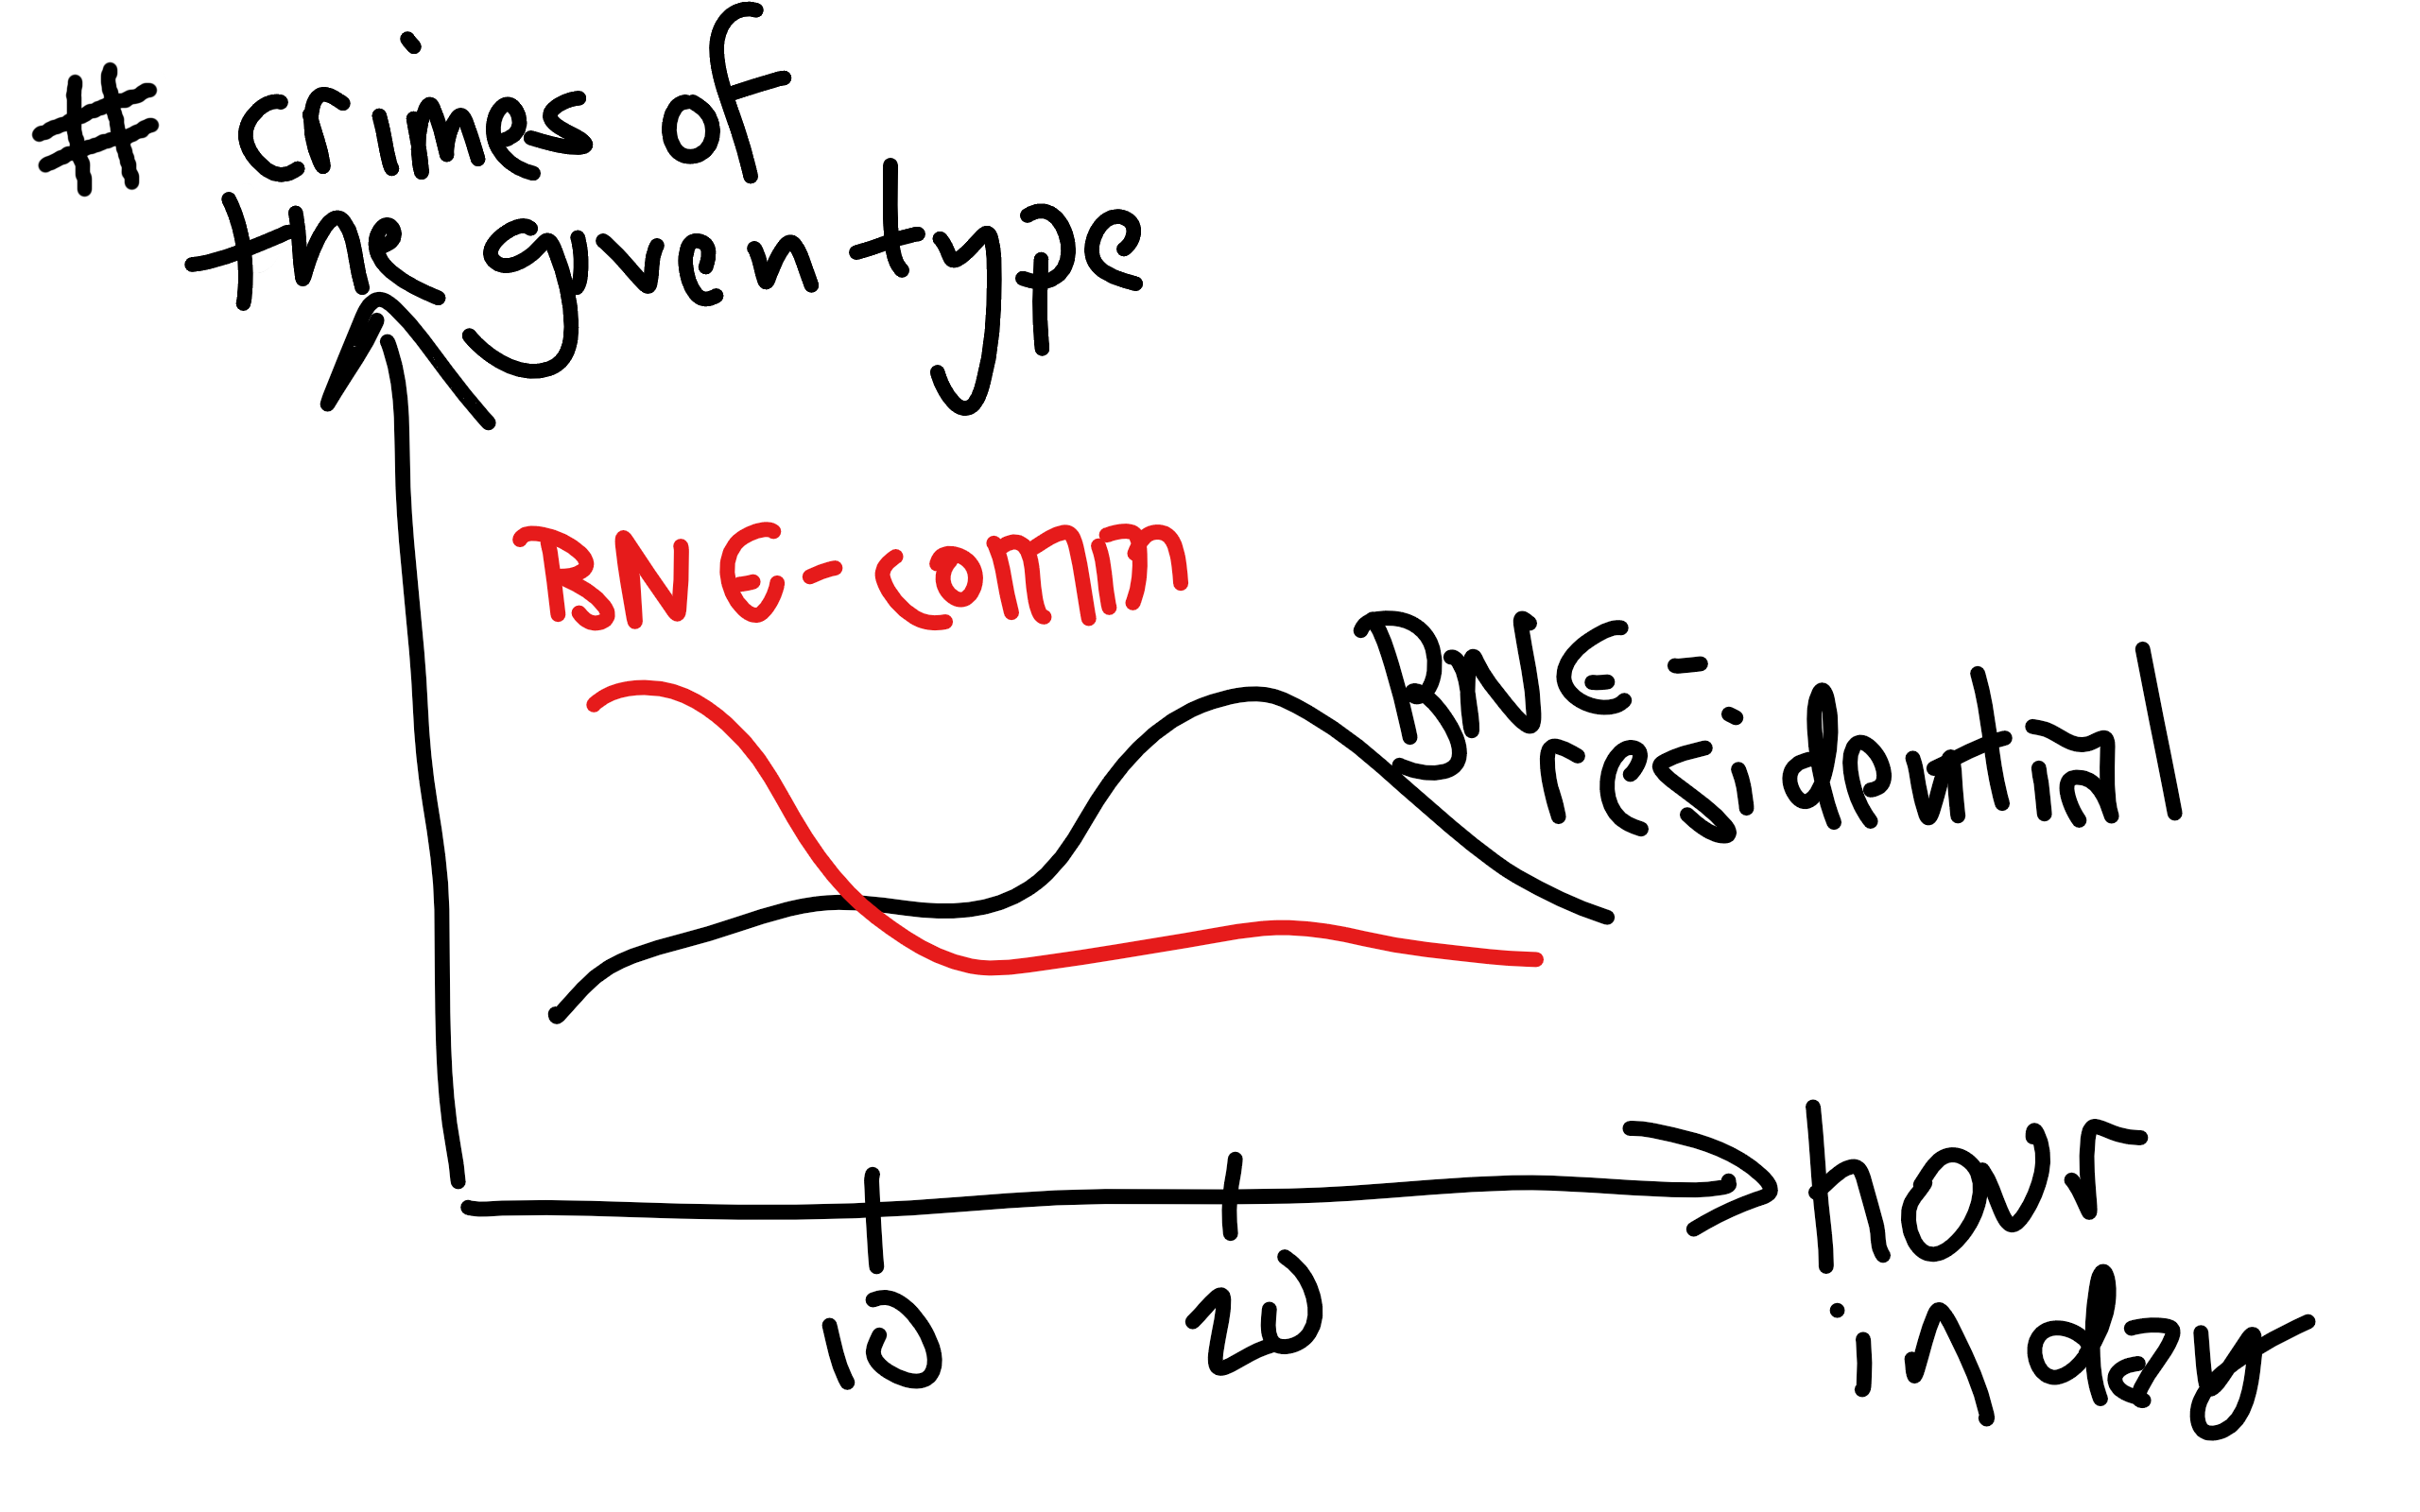
</font>

---

### Step 2a: Design data definitions

#### Document which information you will represent in your data definitions

<font color="blue">
    
We want to represent the type of crime and the hour it occurred.
    
Type of crime best represented by an enumeration (4 cases).
    
Hour can be represented by an interval, integer in the range [0,23].
    
We'll also check the minute, just to see if the data is reliable.  But we don't need to store the minute.

</font>

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Design-data-definitions)
- [Test data](#Parsed-test-data)
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="5"><a href="#main-and-analyze-functions">main</a>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; </td>
    </tr>
    <tr>
        <td style="text-align: right" colspan="2">🡷</td><td>&nbsp;</td><td style="text-align: left"  colspan="2">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Step-2b:-Design-read-function">read</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#main-and-analyze-functions">analyze</a></td>
        <td style="text-align: center">&nbsp;</td>
    </tr>
    <tr>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: left">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Helper:-Checking-for-reliable-data-in-a-row-with-is_reliable">is_reliable</a></td>
        <td style="text-align: center"><a href="#Helper:-Parsing-CrimeType-with-parse_crime_type">parse_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">filter_for_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-hours_in_a_day">hours_in_a_day</a></td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">Another helper</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">is_crime_type</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">count_crimes_in_hour</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">is_crime_in_hour</a></td>
    </tr>
</table>
    
</details>

#### Design data definitions

<div class="alert alert-warning">
    
⚠️ The [magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html) `%run -i ...` below just loads the specified file into the current cell and runs it.  
    
I've included it here to save space, since we've already seen this code a few times... most recently in Module 07b Day 1.  You are **NOT** permitted to use magic commands in your project submission.
    
</div>

You can view the data definitions in a separate file here: [module07b_day1_step2a.py](https://www.students.cs.ubc.ca/~cs-103/redirect/?target=module-8-viz/Lecture_08_Day_1/102_Afternoons_Rik/module07b_day1_step2a.py)

Run the following cell to load and run the file.

In [ ]:
# load and run data definitions for
#   * CrimeType
#   * CrimeData
#   * List[CrimeData]
#   * List[str]
#   * List[int]

%run -i module07b_day1_step2a.py


<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Design-data-definitions)
- [Test data](#Parsed-test-data)
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="5"><a href="#main-and-analyze-functions">main</a>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; </td>
    </tr>
    <tr>
        <td style="text-align: right" colspan="2">🡷</td><td>&nbsp;</td><td style="text-align: left"  colspan="2">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Step-2b:-Design-read-function">read</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#main-and-analyze-functions">analyze</a></td>
        <td style="text-align: center">&nbsp;</td>
    </tr>
    <tr>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: left">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Helper:-Checking-for-reliable-data-in-a-row-with-is_reliable">is_reliable</a></td>
        <td style="text-align: center"><a href="#Helper:-Parsing-CrimeType-with-parse_crime_type">parse_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">filter_for_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-hours_in_a_day">hours_in_a_day</a></td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">Another helper</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">is_crime_type</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">count_crimes_in_hour</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">is_crime_in_hour</a></td>
    </tr>
</table>
    
</details>

### Step 2b: Design read function

#### Design a function to read the information and store it as data in your program

You can view the `read` function and its helpers in a separate file here: [module07b_day1_step2b.py](https://www.students.cs.ubc.ca/~cs-103/redirect/?target=module-8-viz/Lecture_08_Day_1/102_Afternoons_Rik/module07b_day1_step2b.py)

Run the following cell to load and run the file.

In [ ]:
# load and run functions
#   * read
# and helpers
#   * parse_crime_type
#   * is_reliable
#   * crime_type_as_str (new)

%run -i module07b_day1_step2b.py


### Step 2c: Design analyze function

#### Design functions to analyze the data

<div class="alert alert-success">
    
#### ✅ Continuing on Day 2

Last lecture we started with our solution for the problem from module 7 ("Given a type of crime, find the time of day (hour) with the highest frequency"), and set out to modify it to produce the graph that we want now ("Draw a graph of crimes committed in each hour, maybe show different types overlaid in different colours).

To do that, we started over with HtDF for the `analyze` and `main` functions (we do not need to change `read` because we are using the same data).  Here are the HtDF steps:
1. Stub:
    - We modified the signature for both `analyze` and `main` to return `None`.
    - For `main`, the purpose and logic of the body stay the same, so no further modifications are necessary.
    - For `analyze` we modified the purpose and brought back a stub `return` of the appropriate type.
2. Examples:
    - We updated the existing examples for both `analyze` and `main` to test the correct return value (which is always `None`).
    - We ran the cell to confirm that the test cases pass.  Since we always return `None`, passing all of the automatic tests is not sufficient; however, it does give us confidence that the code is syntactically correct.
    - We then started to create ASCII text sketches of what the plots should look like for the various examples.  We completed the first six for `analyze`.  You should have completed the last two examples for `analyze` and all of the examples for `main` (the latter should have be relatively easy, since you have already done sketches for the examples for `analyze`).

Now we will start on step 3 of HtDF for `analyze`.  We include the test data and helper functions from our old version first, so we'll [jump down to the cell where `analyze` is defined](#main-and-analyze-functions).

</div>

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Design-data-definitions)
- [Test data](#Parsed-test-data)
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="5"><a href="#main-and-analyze-functions">main</a>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; </td>
    </tr>
    <tr>
        <td style="text-align: right" colspan="2">🡷</td><td>&nbsp;</td><td style="text-align: left"  colspan="2">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Step-2b:-Design-read-function">read</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#main-and-analyze-functions">analyze</a></td>
        <td style="text-align: center">&nbsp;</td>
    </tr>
    <tr>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: left">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Helper:-Checking-for-reliable-data-in-a-row-with-is_reliable">is_reliable</a></td>
        <td style="text-align: center"><a href="#Helper:-Parsing-CrimeType-with-parse_crime_type">parse_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">filter_for_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-hours_in_a_day">hours_in_a_day</a></td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">Another helper</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">is_crime_type</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">count_crimes_in_hour</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">is_crime_in_hour</a></td>
    </tr>
</table>
    
</details>

#### Parsed test data

Here are the test files parsed into `List[CrimeData]`.  I've included this info here so we can quickly add it as needed to our examples.  Let's skip down to the [`main` function](#main-and-analyze-functions) for now and we'll come back to it.


In [ ]:
# from 'testfile_empty.csv'
TEST_EMPTY = []

# from 'testfile_all_missing.csv'
TEST_ALL_MISSING = [CrimeData(CrimeType.BEC, 0), 
                    CrimeData(CrimeType.BER, 0),
                    CrimeData(CrimeType.TB, 0),
                    CrimeData(CrimeType.TV, 0)] # but none of these should be read

# from 'testfile_all_bec.csv'
TEST_ALL_BEC = [CrimeData(CrimeType.BEC, 6),
                CrimeData(CrimeType.BEC, 18)] # missing data removed

# from 'testfile_all_ber.csv'
TEST_ALL_BER = [CrimeData(CrimeType.BER, 21),
                CrimeData(CrimeType.BER, 17),
                CrimeData(CrimeType.BER, 0)]

# from 'testfile_all_tb.csv'
TEST_ALL_TB = [CrimeData(CrimeType.TB, 1),
               CrimeData(CrimeType.TB, 23),
               CrimeData(CrimeType.TB, 17)]

# from 'testfile_all_tv.csv'
TEST_ALL_TV = [CrimeData(CrimeType.TV, 23),
               CrimeData(CrimeType.TV, 14),
               CrimeData(CrimeType.TV, 21)]

# from 'testfile_all_types.csv'
TEST_ALL_TYPES = [CrimeData(CrimeType.BEC, 1), 
                  CrimeData(CrimeType.BER, 2),
                  CrimeData(CrimeType.TB, 3),
                  CrimeData(CrimeType.TV, 4)]

# from 'testfile_all_bec_hour_6.csv'
TEST_ALL_BEC_HOUR_6 = [CrimeData(CrimeType.BEC, 6),
                       CrimeData(CrimeType.BEC, 6)] # missing data removed

# from 'testfile_all_ber_hour_0.csv'
TEST_ALL_BER_HOUR_0 = [CrimeData(CrimeType.BER, 0),
                       CrimeData(CrimeType.BER, 0),
                       CrimeData(CrimeType.BER, 0)]



<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Design-data-definitions)
- [Test data](#Parsed-test-data)
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="5"><a href="#main-and-analyze-functions">main</a>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; </td>
    </tr>
    <tr>
        <td style="text-align: right" colspan="2">🡷</td><td>&nbsp;</td><td style="text-align: left"  colspan="2">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Step-2b:-Design-read-function">read</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#main-and-analyze-functions">analyze</a></td>
        <td style="text-align: center">&nbsp;</td>
    </tr>
    <tr>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: left">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Helper:-Checking-for-reliable-data-in-a-row-with-is_reliable">is_reliable</a></td>
        <td style="text-align: center"><a href="#Helper:-Parsing-CrimeType-with-parse_crime_type">parse_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">filter_for_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-hours_in_a_day">hours_in_a_day</a></td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">Another helper</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">is_crime_type</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">count_crimes_in_hour</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">is_crime_in_hour</a></td>
    </tr>
</table>
    
</details>

#### Helper function: `filter_for_crime_type`
Here's a helper function (and it's lower-level helper) that we'll use later.  Let's skip down to the [`main` function](#main-and-analyze-functions) for now and we'll come back to it.

In [ ]:
@typecheck
def filter_for_crime_type(locd: List[CrimeData], ct: CrimeType) -> List[CrimeData]:
    """
    Returns only items in locd that have crime type ct.
    """
    # return [] # stub
    
    # template from List[CrimeData]
    
    # description of the accumulator
    matches = []      # type: List[CrimeData]
    
    for cd in locd:
        if is_crime_type(cd, ct):
            matches.append(cd)

    return matches


@typecheck
def is_crime_type(cd: CrimeData, ct: CrimeType) -> bool:
    """
    Returns True if cd has crime type `ct`, otherwise returns False.
    """
    # return False # stub

    # template from CrimeData with additional parameter ct
    return cd.type == ct


# Examples and tests for is_crime_type
start_testing()

# Test 1: does match
# Test 2: doesn't match
expect(is_crime_type(CrimeData(CrimeType.BEC, 0), CrimeType.BEC), True) # Test 1
expect(is_crime_type(CrimeData(CrimeType.BER, 1), CrimeType.BER), True) # Test 1
expect(is_crime_type(CrimeData(CrimeType.TB, 0), CrimeType.TV), False) # Test 2
expect(is_crime_type(CrimeData(CrimeType.TB, 2), CrimeType.TV), False) # Test 2

summary()


# Examples and tests for filter_for_crime_type
start_testing()

# Test 1: empty list
# Test 2: crime type doesn't match any
# Test 3: crime type matches some
expect(filter_for_crime_type([], CrimeType.BEC), []) # Test 1
expect(filter_for_crime_type(TEST_ALL_BEC, CrimeType.TV), []) # Test 2
expect(filter_for_crime_type(TEST_ALL_TB, CrimeType.BER), []) # Test 2
expect(filter_for_crime_type(TEST_ALL_BEC+TEST_ALL_BER, CrimeType.BEC), TEST_ALL_BEC) # Test 3
expect(filter_for_crime_type(TEST_ALL_BEC+TEST_ALL_BER, CrimeType.BER), TEST_ALL_BER) # Test 3

summary()



<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Design-data-definitions)
- [Test data](#Parsed-test-data)
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="5"><a href="#main-and-analyze-functions">main</a>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; </td>
    </tr>
    <tr>
        <td style="text-align: right" colspan="2">🡷</td><td>&nbsp;</td><td style="text-align: left"  colspan="2">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Step-2b:-Design-read-function">read</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#main-and-analyze-functions">analyze</a></td>
        <td style="text-align: center">&nbsp;</td>
    </tr>
    <tr>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: left">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Helper:-Checking-for-reliable-data-in-a-row-with-is_reliable">is_reliable</a></td>
        <td style="text-align: center"><a href="#Helper:-Parsing-CrimeType-with-parse_crime_type">parse_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">filter_for_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-hours_in_a_day">hours_in_a_day</a></td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">Another helper</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">is_crime_type</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">count_crimes_in_hour</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">is_crime_in_hour</a></td>
    </tr>
</table>
    
</details>

#### Helper function: `hours_in_a_day`
Here's a helper function that we'll use later.  Let's skip down to the [`main` function](#main-and-analyze-functions) for now and we'll come back to it.

In [ ]:
@typecheck
def hours_in_a_day() -> List[int]:
    """
    Returns a list of the hours in a day: [0,23].
    """
    # return [] # stub
    
    # no template
    hours = []
    
    for h in range(24): # range is like a list, but subtly different
        hours.append(h)
    # or just hours = list(range(24))
    
    return hours


# Examples and tests for hours_in_a_day
start_testing()

expect(hours_in_a_day(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

summary()



<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Design-data-definitions)
- [Test data](#Parsed-test-data)
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="5"><a href="#main-and-analyze-functions">main</a>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; </td>
    </tr>
    <tr>
        <td style="text-align: right" colspan="2">🡷</td><td>&nbsp;</td><td style="text-align: left"  colspan="2">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Step-2b:-Design-read-function">read</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#main-and-analyze-functions">analyze</a></td>
        <td style="text-align: center">&nbsp;</td>
    </tr>
    <tr>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: left">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Helper:-Checking-for-reliable-data-in-a-row-with-is_reliable">is_reliable</a></td>
        <td style="text-align: center"><a href="#Helper:-Parsing-CrimeType-with-parse_crime_type">parse_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">filter_for_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-hours_in_a_day">hours_in_a_day</a></td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">Another helper</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">is_crime_type</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">count_crimes_in_hour</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">is_crime_in_hour</a></td>
    </tr>
</table>
    
</details>

#### Another helper function for `analyze`

Let's apply the HtDF recipe to design a new `count_crimes_by_hour` function.  Later we'll skip down to the [`main` function](#main-and-analyze-functions) to test our program.  We may also want to review the [parsed test data](#Parsed-test-data).

In [ ]:
# BOOKMARK: On Day 2 we'll redesign our old `find_hour_with_most_crimes`
# function into a new `count_crimes_by_hour` which will serve
# as a helper for `analyze` to generate our plot data.

@typecheck
def find_hour_with_most_crimes(hours: List[int], locd: List[CrimeData]) -> int:
    """
    Returns hour in `hours` for which locd has the most occurrences.
    
    In case of a tie, returns earliest hour.
    
    Assumes `hours` is not empty.
    """
    # return -1 # stub
    
    # template from List[int] with extra parameter locd

    # maximum number of crimes by hour in list so far
    max_crimes = 0 # type: int
    
    # hour of maximum crimes in list so far
    hour_of_max_crimes = hours[0] # type: int
    
    for h in hours:
        crimes_in_hour = count_crimes_in_hour(locd, h)
        if crimes_in_hour > max_crimes:
            max_crimes = crimes_in_hour
            hour_of_max_crimes = h
        
    return hour_of_max_crimes


@typecheck
def is_crime_in_hour(cd: CrimeData, hour: int) -> bool:
    """
    Returns True if crime `cd` occurred during `hour`, otherwise False.
    """
    # return False # stub

    # template from CrimeData with extra parameter hour
    return cd.hour == hour


# Examples and tests for is_crime_in_hour
start_testing()

# Test 1: Crime is not in hour
# Test 2: Crime is in hour
expect(is_crime_in_hour(CrimeData(CrimeType.BEC, 7), 0), False) # Test 1
expect(is_crime_in_hour(CrimeData(CrimeType.BEC, 7), 7), True) # Test 2
expect(is_crime_in_hour(CrimeData(CrimeType.TV, 0), 0), True) # Test 2

summary()


# Examples and tests for count_crimes_in_hour
start_testing()

# Test 1: Empty crime data list
# Test 2: Not empty but no crimes in given hour
# Test 3: Crimes in given hour, of various types
expect(count_crimes_in_hour([], 1), 0) # Test 1
expect(count_crimes_in_hour(TEST_ALL_BER, 1), 0) # Test 2
expect(count_crimes_in_hour(TEST_ALL_BER, 17), 1) # Test 3
expect(count_crimes_in_hour(TEST_ALL_TB+TEST_ALL_TV, 23), 2) # Test 3
expect(count_crimes_in_hour(TEST_ALL_TB+TEST_ALL_TV, 17), 1) # Test 3
expect(count_crimes_in_hour(TEST_ALL_TV+TEST_ALL_TB, 23), 2) # Test 3 (crimes shuffled)

summary()


# Examples and tests for find_hour_with_most_crimes
start_testing()

# Test 1: Empty crime data list
# Test 2: Not empty but no crimes in given hours
# Test 3: Crimes in given hours, of various types
expect(find_hour_with_most_crimes([1], []), 1) # Test 1
expect(find_hour_with_most_crimes([5, 6, 7, 8], TEST_ALL_TYPES), 5) # Test 2
expect(find_hour_with_most_crimes([8, 7, 6, 5], TEST_ALL_TYPES), 8) # Test 2 (hours reversed)
expect(find_hour_with_most_crimes([3, 4, 5, 6], TEST_ALL_TYPES), 3) # Test 3
expect(find_hour_with_most_crimes([6, 5, 4, 3], TEST_ALL_TYPES), 4) # Test 3 (hours reversed)
expect(find_hour_with_most_crimes([1, 14, 17, 21, 23], TEST_ALL_TB+TEST_ALL_TV), 23) # Test 3 (mixed crime types)
expect(find_hour_with_most_crimes([1, 14, 17, 21, 23], TEST_ALL_TV+TEST_ALL_TB), 23) # Test 3 (crimes shuffled)

summary()



<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
   
```python
@typecheck
def count_crimes_by_hour(hours: List[int], locd: List[CrimeData]) -> List[int]:
    """
    Returns a list of crime counts from `locd` broken down 
    by hour in `hours`.
    
    Assumes `hours` is not empty.
    """
    # return [] # stub
    
    # template from List[int] with extra parameter locd

    # list of crime counts by hour so far
    crime_counts = [] # type: List[int]
    
    for h in hours:
        crimes_in_hour = count_crimes_in_hour(locd, h)
        crime_counts.append(crimes_in_hour)
        
    return crime_counts


@typecheck
def count_crimes_in_hour(locd: List[CrimeData], hour: int) -> int:
    """
    Returns the number of crimes from `locd` that occur at a particular `hour`.
    """
    # return -1 # stub
    
    # template from List[CrimeData] with extra parameter hour
    
    # count of crimes in given hour in list so far
    count = 0      # type: int
    for cd in locd:
        if is_crime_in_hour(cd, hour):
            count = count + 1
    return count


@typecheck
def is_crime_in_hour(cd: CrimeData, hour: int) -> bool:
    """
    Returns True if crime `cd` occurred during `hour`, otherwise False.
    """
    # return False # stub

    # template from CrimeData with extra parameter hour
    return cd.hour == hour


# Examples and tests for is_crime_in_hour
start_testing()

# Test 1: Crime is not in hour
# Test 2: Crime is in hour
expect(is_crime_in_hour(CrimeData(CrimeType.BEC, 7), 0), False) # Test 1
expect(is_crime_in_hour(CrimeData(CrimeType.BEC, 7), 7), True) # Test 2
expect(is_crime_in_hour(CrimeData(CrimeType.TV, 0), 0), True) # Test 2

summary()


# Examples and tests for count_crimes_in_hour
start_testing()

# Test 1: Empty crime data list
# Test 2: Not empty but no crimes in given hour
# Test 3: Crimes in given hour, of various types
expect(count_crimes_in_hour([], 1), 0) # Test 1
expect(count_crimes_in_hour(TEST_ALL_BER, 1), 0) # Test 2
expect(count_crimes_in_hour(TEST_ALL_BER, 17), 1) # Test 3
expect(count_crimes_in_hour(TEST_ALL_TB+TEST_ALL_TV, 23), 2) # Test 3
expect(count_crimes_in_hour(TEST_ALL_TB+TEST_ALL_TV, 17), 1) # Test 3
expect(count_crimes_in_hour(TEST_ALL_TV+TEST_ALL_TB, 23), 2) # Test 3 (crimes shuffled)

summary()


# Examples and tests for count_crimes_by_hour
start_testing()

# Test 1: Empty crime data list
# Test 2: Not empty but no crimes in given hours
# Test 3: Crimes in given hours, of various types
expect(count_crimes_by_hour([1], []), [0]) # Test 1
expect(count_crimes_by_hour([5, 6, 7, 8], TEST_ALL_TYPES), [0, 0, 0, 0]) # Test 2
expect(count_crimes_by_hour([8, 7, 6, 5], TEST_ALL_TYPES), [0, 0, 0, 0]) # Test 2 (hours reversed)
expect(count_crimes_by_hour([3, 4, 5, 6], TEST_ALL_TYPES), [1, 1, 0, 0]) # Test 3
expect(count_crimes_by_hour([6, 5, 4, 3], TEST_ALL_TYPES), [0, 0, 1, 1]) # Test 3 (hours reversed)
expect(count_crimes_by_hour([1, 14, 17, 21, 23], TEST_ALL_TB+TEST_ALL_TV), [1, 1, 1, 1, 2]) # Test 3 (mixed crime types)
expect(count_crimes_by_hour([1, 14, 17, 21, 23], TEST_ALL_TV+TEST_ALL_TB), [1, 1, 1, 1, 2]) # Test 3 (crimes shuffled)

summary()
```
</details>

---

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Design-data-definitions)
- [Test data](#Parsed-test-data)
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="5"><a href="#main-and-analyze-functions">main</a>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; </td>
    </tr>
    <tr>
        <td style="text-align: right" colspan="2">🡷</td><td>&nbsp;</td><td style="text-align: left"  colspan="2">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Step-2b:-Design-read-function">read</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#main-and-analyze-functions">analyze</a></td>
        <td style="text-align: center">&nbsp;</td>
    </tr>
    <tr>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: left">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Helper:-Checking-for-reliable-data-in-a-row-with-is_reliable">is_reliable</a></td>
        <td style="text-align: center"><a href="#Helper:-Parsing-CrimeType-with-parse_crime_type">parse_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">filter_for_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-hours_in_a_day">hours_in_a_day</a></td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">Another helper</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">is_crime_type</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">count_crimes_in_hour</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">is_crime_in_hour</a></td>
    </tr>
</table>
    
</details>

#### Helper function: `plot_crimes_by_hour`
To draw a graph, we'll build a helper function `plot_crimes_by_hour` here by copying code from a relevant [Worked Example](https://www.students.cs.ubc.ca/~cs-103/redirect/?target=module-8-viz/Worked-Examples). 

Let's skip down to the [`main` function](#main-and-analyze-functions) for now and we'll come back to it.

<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Design-data-definitions)
- [Test data](#Parsed-test-data)
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="5"><a href="#main-and-analyze-functions">main</a>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; </td>
    </tr>
    <tr>
        <td style="text-align: right" colspan="2">🡷</td><td>&nbsp;</td><td style="text-align: left"  colspan="2">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Step-2b:-Design-read-function">read</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#main-and-analyze-functions">analyze</a></td>
        <td style="text-align: center">&nbsp;</td>
    </tr>
    <tr>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: left">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Helper:-Checking-for-reliable-data-in-a-row-with-is_reliable">is_reliable</a></td>
        <td style="text-align: center"><a href="#Helper:-Parsing-CrimeType-with-parse_crime_type">parse_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">filter_for_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-hours_in_a_day">hours_in_a_day</a></td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">Another helper</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">is_crime_type</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">count_crimes_in_hour</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">is_crime_in_hour</a></td>
    </tr>
</table>
    
</details>

#### `main` and `analyze` functions

Here are our `main` and `analyze` functions from Day 1. We have finished steps 1 (stub) and 2 (examples) of HtDF for `main` and `analyze`.  We do not need to further modify `main` since the body of the function does not change.  But we still need to finish HtDF for `analyze`.

Recall, that our purpose today is:

> Draw a graph of crimes committed in each hour, maybe show different types overlaid in different colours

We will start by plotting a single crime type.

In [ ]:
###########
# Functions

@typecheck
def main(filename: str, 
         crime_type: CrimeType) -> None:
    """
    Reads the file from given filename, analyzes the data, returns the result 
    """
    # Template from HtDAP, based on function composition 
    return analyze(read(filename), crime_type) 
    
    
@typecheck
def analyze(locd: List[CrimeData], 
            crime_type: CrimeType) -> None: 
    """ 
    Plots the number of crimes of a particular
    type for each hour of the day from the list 
    locd.
    """ 

    # return None # stub
    
    # template based on composition
    # Step 1: filter list for crime type
    crimes_of_type = filter_for_crime_type(locd, crime_type)
    # Step 2: build a list of hours of the day
    hours = hours_in_a_day()
    # Step 3: find hour of the day most common in list
    worst_hour = find_hour_with_most_crimes(hours, crimes_of_type)
    # Step 4: return that hour
    return worst_hour

# Examples and tests for analyze
start_testing()

# Test 1: empty list
# Test 2: no matching crime type
# Test 3: some matching crime types
expect(analyze([], CrimeType.BEC), None) # Test 1
# We expect an empty plot like this:
#
# number
# of crimes
#    |
#  1 |
#    |
#  0 +---------------------- hour
#    0    6    12    18     
expect(analyze(TEST_ALL_BEC, CrimeType.BER), None) # Test 2
# We expect an empty plot like this:
#
# number
# of crimes
#    |
#  1 |
#    |
#  0 +---------------------- hour
#    0    6    12    18     
expect(analyze(TEST_ALL_BEC, CrimeType.TB), None) # Test 2
# We expect an empty plot like this:
#
# number
# of crimes
#    |
#  1 |
#    |
#  0 +---------------------- hour
#    0    6    12    18     
expect(analyze(TEST_ALL_BEC, CrimeType.TV), None) # Test 2
# We expect an empty plot like this:
#
# number
# of crimes
#    |
#  1 |
#    |
#  0 +---------------------- hour
#    0    6    12    18     
expect(analyze(TEST_ALL_BEC, CrimeType.BEC), None) # Test 3
# We expect a plot similar to this:
#
# number
# of crimes
#    |    
#  1 |    *          *
#    |    |          |
#  0 +----|----------|------- hour
#    0    6    12    18     
expect(analyze(TEST_ALL_BER_HOUR_0, CrimeType.BER), None) # Test 3
# We expect a plot similar to this:
#
# number
# of crimes
#    |
#  3 *
#    |\
#  2 ||
#    ||
#  1 ||
#    ||
#  0 +----|----------|------- hour
#    0    6    12    18     
expect(analyze(TEST_ALL_BEC+TEST_ALL_BEC_HOUR_6, CrimeType.BEC), None) # Test 3
# We expect a plot similar to this:
#
# number
# of crimes
#    |
#  3 |    *
#    |    |
#  2 |    |
#    |    |
#  1 |    |          *
#    |    |          |
#  0 +----|----------|------- hour
#    0    6    12    18     
expect(analyze(TEST_ALL_BEC_HOUR_6+TEST_ALL_BEC, CrimeType.BEC), None) # Test 3
# We expect a plot similar to this:
#
# number
# of crimes
#    |
#  3 |    *
#    |    |
#  2 |    |
#    |    |
#  1 |    |          *
#    |    |          |
#  0 +----|----------|------- hour
#    0    6    12    18     

summary()


# Examples and tests for main 
start_testing()

# Test 1: empty file
# Test 2: invalid data
# Test 3: no matching crime types
# Test 4: some matching crime types
expect(main('testfile_empty.csv', CrimeType.BEC), None) # Test 1
# We expect an empty plot like this:
#
# number
# of crimes
#    |
#  1 |
#    |
#  0 +---------------------- hour
#    0    6    12    18     
expect(main('testfile_all_missing.csv', CrimeType.BER), None) # Test 2
# We expect an empty plot like this:
#
# number
# of crimes
#    |
#  1 |
#    |
#  0 +---------------------- hour
#    0    6    12    18     
expect(main('testfile_all_bec.csv', CrimeType.BER), None) # Test 3
# We expect an empty plot like this:
#
# number
# of crimes
#    |
#  1 |
#    |
#  0 +---------------------- hour
#    0    6    12    18     
expect(main('testfile_all_bec.csv', CrimeType.TB), None) # Test 3
# We expect an empty plot like this:
#
# number
# of crimes
#    |
#  1 |
#    |
#  0 +---------------------- hour
#    0    6    12    18     
expect(main('testfile_all_bec.csv', CrimeType.TV), None) # Test 3
# We expect an empty plot like this:
#
# number
# of crimes
#    |
#  1 |
#    |
#  0 +---------------------- hour
#    0    6    12    18     
expect(main('testfile_all_bec.csv', CrimeType.BEC), None) # Test 4
# We expect a plot similar to this:
#
# number
# of crimes
#    |    
#  1 |    *          *
#    |    |          |
#  0 +----|----------|------- hour
#    0    6    12    18     
expect(main('testfile_all_ber_hour_0.csv', CrimeType.BER), None) # Test 4
# We expect a plot similar to this:
#
# number
# of crimes
#    |
#  3 *
#    |\
#  2 ||
#    ||
#  1 ||
#    ||
#  0 +----|----------|------- hour
#    0    6    12    18     

summary()



<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
   
```python
###########
# Functions

@typecheck
def main(filename: str, 
         crime_type: CrimeType) -> None:
    """
    Reads the file from given filename, analyzes the data, 
    plots the result 
    """
    # Template from HtDAP, based on function composition 
    return analyze(read(filename), crime_type) 
    
    
@typecheck
def analyze(locd: List[CrimeData], 
            crime_type: CrimeType) -> None: 
    """ 
    Plots the count of crimes of type `crime_type`
    reported for each hour of the day.
    """ 

    # return None # stub
    
    # template based on composition
    # Step 1: filter list for crime type
    crimes_of_type = filter_for_crime_type(locd, crime_type)
    # Step 2: build a list of hours of the day
    hours = hours_in_a_day()
    # Step 3: build list of crime counts for each hour
    crime_counts = count_crimes_by_hour(hours, crimes_of_type)
    # Step 4: plot crime counts versus hour
    plot_crimes_by_hour(hours, crime_counts, crime_type)
    pyplot.show()

    
@typecheck
def plot_crimes_by_hour(hours: List[int], crime_counts: List[int], crime_type: CrimeType) -> None:
    """
    Generates and holds (doesn't show) a plot of `crime_counts`, or crimes reported per hour,
    for all `hours`.  Adds a legend label for the `crime_type`.
    """
    # return None
    # Template based on visualization

    # set the x-axis label, y-axis label, and plot title
    pyplot.xlabel('hour of the day')
    pyplot.ylabel('crimes reported')
    pyplot.title('2018 VPD Crime Data')

    # plot our data 
    pyplot.plot(hours, crime_counts, label=crime_type_as_str(crime_type))
    pyplot.legend() # after adding a labelled plot
    
    return None
    

# Examples and tests for plot_crimes_by_hour
start_testing()

expect(plot_crimes_by_hour([], [], CrimeType.BEC), None)
pyplot.show() # required since plot_crimes_by_hour doesn't show graph itself
# Graph should not show any data points       

expect(plot_crimes_by_hour([1, 2], [3, 4], CrimeType.BEC), None)
pyplot.show() # required since plot_crimes_by_hour doesn't show graph itself
# Graph should look like:
#    crimes
#    reported
#    4 |   --*
#    3 |  *
#    2 |
#    1 |  
#    0 +--+--+-- hour of the day
#      0  1  2

summary()


# Examples and tests for analyze
start_testing()

# Test 1: empty list
# Test 2: no matching crime type
# Test 3: some matching crime types
expect(analyze([], CrimeType.BEC), None) # Test 1
# Graph should look like:
#    crimes
#    reported
#    1 |
#      |
#    0 +--+--+--+-- hour of the day
#      0  6  12 18
expect(analyze(TEST_ALL_BEC, CrimeType.BER), None) # Test 2
# Graph should look like:
#    crimes
#    reported
#    1 |
#      |
#    0 +--+--+--+-- hour of the day
#      0  6  12 18
expect(analyze(TEST_ALL_BEC, CrimeType.BEC), None) # Test 3
# Graph should look like:
#    crimes
#    reported
#    1 |  *     *
#      |  |\    |\
#    0 +--+--+--+-- hour of the day
#      0  6  12 18
expect(analyze(TEST_ALL_BER_HOUR_0, CrimeType.BER), None) # Test 3
# Graph should look like:
#    crimes
#    reported
#    3 *
#      |\
#    0 +--+--+--+-- hour of the day
#      0  6  12 18
expect(analyze(TEST_ALL_BEC+TEST_ALL_BEC_HOUR_6, CrimeType.BEC), None) # Test 3
# Graph should look like:
#    crimes
#    reported
#    3 |  *
#      |  |
#    2 |  |
#      |  |
#    1 |  |     *
#      |  |\    |\   
#    0 +--+--+--+-- hour of the day
#      0  6  12 18

summary()


# Examples and tests for main 
start_testing()

# Test 1: empty file
# Test 2: invalid data
# Test 3: no matching crime types
# Test 4: some matching crime types
expect(main('testfile_empty.csv', CrimeType.BEC), None) # Test 1
# Graph should look like:
#    crimes
#    reported
#    1 |
#      |
#    0 +--+--+--+-- hour of the day
#      0  6  12 18
expect(main('testfile_all_missing.csv', CrimeType.BER), None) # Test 2
# Graph should look like:
#    crimes
#    reported
#    1 |
#      |
#    0 +--+--+--+-- hour of the day
#      0  6  12 18
expect(main('testfile_all_bec.csv', CrimeType.BER), None) # Test 3
# Graph should look like:
#    crimes
#    reported
#    1 |
#      |
#    0 +--+--+--+-- hour of the day
#      0  6  12 18
expect(main('testfile_all_bec.csv', CrimeType.BEC), None) # Test 4
# Graph should look like:
#    crimes
#    reported
#    1 |  *     *
#      |  |\    |\
#    0 +--+--+--+-- hour of the day
#      0  6  12 18
expect(main('testfile_all_ber_hour_0.csv', CrimeType.BER), None) # Test 4
# Graph should look like:
#    crimes
#    reported
#    3 *
#      |\
#    0 +--+--+--+-- hour of the day
#      0  6  12 18

summary()
```
    
---

### Final Graph/Chart

Now that everything is working, you **must** call `main` on the intended information source in order to display the final graph/chart:

#### BNE Commercial

In [ ]:
main('crimedata_subset_bne_theft_of_bike_veh_2018.csv', 
     CrimeType.BEC) # BNE Commercial



#### BNE Residential/Other

In [ ]:
main('crimedata_subset_bne_theft_of_bike_veh_2018.csv', 
     CrimeType.BER) # BNE Residential/Other



#### Theft of Bicycle

In [ ]:
main('crimedata_subset_bne_theft_of_bike_veh_2018.csv', 
     CrimeType.TB) # Theft of Bicycle



#### Theft of Vehicle

In [ ]:
main('crimedata_subset_bne_theft_of_bike_veh_2018.csv', 
     CrimeType.TV) # Theft of Vehicle



# Exercise 2: Multi-line chart

Recall that our goal was:
    
> Draw a graph of crimes committed in each hour, **maybe show different types overlaid in different colours**

We have done the first part, but to overlay different lines we need to create a multi-line chart.

In [ ]:
# Example of multi-line chart from last class.
x_vals = [0, 1, 2, 3, 4]
x_squared = [0, 1, 4, 9, 16]
x_cubed = [0, 1, 8, 27, 64]
pyplot.plot(x_vals, x_squared, label='$x^2$')
pyplot.plot(x_vals, x_cubed, label='$x^3$')
pyplot.legend()
pyplot.show()



<details class="alert alert-success" style="float: right; margin-left: 1em;"><summary style="display:list-item">Jump to...</summary>

- [Data definitions](#Design-data-definitions)
- [Test data](#Parsed-test-data)
- or functions:    
<table>
    <tr>
        <td style="text-align: center" colspan="5"><a href="#main-and-analyze-functions">main</a>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; </td>
    </tr>
    <tr>
        <td style="text-align: right" colspan="2">🡷</td><td>&nbsp;</td><td style="text-align: left"  colspan="2">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Step-2b:-Design-read-function">read</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#main-and-analyze-functions">analyze</a></td>
        <td style="text-align: center">&nbsp;</td>
    </tr>
    <tr>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: right">🡷</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: left">🡶</td>
    </tr>
    <tr>
        <td style="text-align: center"><a href="#Helper:-Checking-for-reliable-data-in-a-row-with-is_reliable">is_reliable</a></td>
        <td style="text-align: center"><a href="#Helper:-Parsing-CrimeType-with-parse_crime_type">parse_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">filter_for_crime_type</a></td>
        <td style="text-align: center"><a href="#Helper-function:-hours_in_a_day">hours_in_a_day</a></td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">Another helper</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center">🡳</td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="2">&nbsp;</td>
        <td style="text-align: center"><a href="#Helper-function:-filter_for_crime_type">is_crime_type</a></td>
        <td style="text-align: center">&nbsp;</td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">count_crimes_in_hour</a></td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center">🡳</td>
    </tr>
    <tr>
        <td style="text-align: center" colspan="4">&nbsp;</td>
        <td style="text-align: center"><a href="#Another-helper-function-for-analyze">is_crime_in_hour</a></td>
    </tr>
</table>
    
</details>

## Multiline chart of crime data

Let's start by copying our `main`, `analyze`, and `plot_crimes_by_hour` functions from the cell above.  Then we'll revise them to draw a multi-line chart with all four crime types.

In [ ]:
# TODO: Copy `plot_crimes_by_hour` from above.



In [ ]:
# TODO: Copy `main` and `analyze` from above.



<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
   
```python
###########
# Functions

@typecheck
def main(filename: str) -> None:
    """
    Reads the file from given filename, analyzes the data, 
    plots the result 
    """
    # Template from HtDAP, based on function composition 
    return plot_all_crime_types(read(filename)) 
    

@typecheck 
def plot_all_crime_types(locd: List[CrimeData]) -> None:
    """
    Plots the count of crimes reported for each hour of the day
    for all four crime types in CrimeType.
    """
    # template based on composition
    # Step 1: plot for BEC
    plot_one_crime_type(locd, CrimeType.BEC)
    # Step 2: plot for BER
    plot_one_crime_type(locd, CrimeType.BER)
    # Step 3: plot for TB
    plot_one_crime_type(locd, CrimeType.TB)
    # Step 4: plot for TV
    plot_one_crime_type(locd, CrimeType.TV)
    # Step 5: show plot
    pyplot.show()
    
    
@typecheck
def plot_one_crime_type(locd: List[CrimeData], 
            crime_type: CrimeType) -> None: 
    """ 
    Plots the count of crimes of type `crime_type`
    reported for each hour of the day.
    """ 

    # return None # stub
    
    # template based on composition
    # Step 1: filter list for crime type
    crimes_of_type = filter_for_crime_type(locd, crime_type)
    # Step 2: build a list of hours of the day
    hours = hours_in_a_day()
    # Step 3: build list of crime counts for each hour
    crime_counts = count_crimes_by_hour(hours, crimes_of_type)
    # Step 4: plot crime counts versus hour
    plot_crimes_by_hour(hours, crime_counts, crime_type)

    
@typecheck
def plot_crimes_by_hour(hours: List[int], crime_counts: List[int], crime_type: CrimeType) -> None:
    """
    Generates and holds (doesn't show) a plot of `crime_counts`, or crimes reported per hour,
    for all `hours`.  Adds a legend label for the `crime_type`.
    """
    # return None
    # Template based on visualization

    # set the x-axis label, y-axis label, and plot title
    pyplot.xlabel('hour of the day')
    pyplot.ylabel('crimes reported')
    pyplot.title('2018 VPD Crime Data')

    # plot our data 
    pyplot.plot(hours, crime_counts, label=crime_type_as_str(crime_type))
    pyplot.legend() # after adding a labelled plot
    
    return None
    

# Examples and tests for plot_crimes_by_hour
start_testing()

expect(plot_crimes_by_hour([], [], CrimeType.BEC), None)
pyplot.show() # required since plot_crimes_by_hour doesn't show graph itself
# Graph should not show any data points       

expect(plot_crimes_by_hour([1, 2], [3, 4], CrimeType.BEC), None)
pyplot.show() # required since plot_crimes_by_hour doesn't show graph itself
# Graph should look like:
#    crimes
#    reported
#    4 |   --*
#    3 |  *
#    2 |
#    1 |  
#    0 +--+--+-- hour of the day
#      0  1  2

summary()


# Examples and tests for plot_one_crime_type
start_testing()

# Test 1: empty list
# Test 2: no matching crime type
# Test 3: some matching crime types
expect(plot_one_crime_type([], CrimeType.BEC), None) # Test 1
pyplot.show() # required since plot_one_crime_type doesn't show graph itself
# Graph should look like:
#    crimes
#    reported
#    1 |
#      |
#    0 +--+--+--+-- hour of the day
#      0  6  12 18
expect(plot_one_crime_type(TEST_ALL_BEC, CrimeType.BER), None) # Test 2
pyplot.show() # required since plot_one_crime_type doesn't show graph itself
# Graph should look like:
#    crimes
#    reported
#    1 |
#      |
#    0 +--+--+--+-- hour of the day
#      0  6  12 18
expect(plot_one_crime_type(TEST_ALL_BEC, CrimeType.BEC), None) # Test 3
pyplot.show() # required since plot_one_crime_type doesn't show graph itself
# Graph should look like:
#    crimes
#    reported
#    1 |  *     *
#      |  |\    |\
#    0 +--+--+--+-- hour of the day
#      0  6  12 18
expect(plot_one_crime_type(TEST_ALL_BER_HOUR_0, CrimeType.BER), None) # Test 3
pyplot.show() # required since plot_one_crime_type doesn't show graph itself
# Graph should look like:
#    crimes
#    reported
#    3 *
#      |\
#    0 +--+--+--+-- hour of the day
#      0  6  12 18
expect(plot_one_crime_type(TEST_ALL_BEC+TEST_ALL_BEC_HOUR_6, CrimeType.BEC), None) # Test 3
pyplot.show() # required since plot_one_crime_type doesn't show graph itself
# Graph should look like:
#    crimes
#    reported
#    3 |  *
#      |  |
#    2 |  |
#      |  |
#    1 |  |     *
#      |  |\    |\   
#    0 +--+--+--+-- hour of the day
#      0  6  12 18

summary()


# Examples and tests for plot_all_crime_types remain to be written!
...


# Examples and tests for main 
start_testing()

# Test 1: empty file
# Test 2: invalid data
# Test 3: no matching crime types
# Test 4: some matching crime types
expect(main('testfile_empty.csv'), None) # Test 1
# Graph should look like:
#    crimes
#    reported
#    1 |
#      |
#    0 +--+--+--+-- hour of the day
#      0  6  12 18
expect(main('testfile_all_missing.csv'), None) # Test 2
# Graph should look like:
#    crimes
#    reported
#    1 |
#      |
#    0 +--+--+--+-- hour of the day
#      0  6  12 18
expect(main('testfile_all_bec.csv'), None) # Test 3
# Graph should look like:
#    crimes
#    reported
#    1 |
#      |
#    0 +--+--+--+-- hour of the day
#      0  6  12 18
expect(main('testfile_all_bec.csv'), None) # Test 4
# Graph should look like:
#    crimes
#    reported
#    1 |  *     *
#      |  |\    |\
#    0 +--+--+--+-- hour of the day
#      0  6  12 18
expect(main('testfile_all_ber_hour_0.csv'), None) # Test 4
# Graph should look like:
#    crimes
#    reported
#    3 *
#      |\
#    0 +--+--+--+-- hour of the day
#      0  6  12 18

summary()
```
    
</details>

<div class="alert alert-success">
    
### ✅ Re-use functions when possible!

For example, we didn't need to write four different plot functions for the different crime types.  We
designed **one** function and **called it** multiple times.
    
</div>




---

Here we come to the end!  Let's see the final result:

In [ ]:
main('crimedata_subset_bne_theft_of_bike_veh_2018.csv')



---

# That's all, folks!

We've spent the last few weeks building up the knowledge we need to design an analysis program and visualize information.  These are skills that will be useful for your project.

But beyond that, you are now able to:
- Write small programs that solve a problem in an academic discipline of your choice and are readable, well-organized, well-documented, and well-tested.
- Write small programs for a reasonably complex task, where the ability to use the one task - one function rule can be demonstrated.
- Design the data representation for a reasonably complex problem.
- Describe the information encoded in given data.

---

# After the course...

* You will have access to Syzygy as long as you are a registered UBC student.
  * After the term ends, access Syzygy by going to [https://ubc.syzygy.ca/].
  * If you want to download a copy of your CPSC 103 files to your own computer, see [here](https://docs.google.com/document/d/180jP5st75NDXFpQW5jkfUrji4uZVaBPtTBobNpmOJv8/edit?usp=sharing) for instructions.
* For a brief discussion of how what you learned in CPSC 103 fits into the Python ecosystem, see [Programming beyond CPSC 103](https://canvas.ubc.ca/courses/147818/pages/programming-beyond-cpsc-103) on Canvas.
  * Python provides (and many programmers take advantage of) lots of shortcuts to make programming faster.  *Do not be fooled.*  When programming, you should always emphasize correctness and readability over programming or execution speed.
  * The design principles that you learned in CPSC 103 will not be enforced when you are programming in the wild.  But you are much more likely to arrive at a working, readable and correct solution if you continue to follow them at least in spirit.

## Interested in More Programming?
What courses are accessible after CPSC 103?
* [CPSC 203](https://courses.students.ubc.ca/cs/courseschedule?pname=subjarea&tname=subj-course&dept=CPSC&course=203) - Use Python to learn about data structures other than lists and solve some really interesting problems!
* [CPSC 107](https://courses.students.ubc.ca/cs/courseschedule?pname=subjarea&tname=subj-course&dept=CPSC&course=107) - Important if you want to apply for a CS major!  Uses a subset of the Racket language.
* [CPSC 110](https://courses.students.ubc.ca/cs/courseschedule?pname=subjarea&tname=subj-course&dept=CPSC&course=110) - Either CPSC 103+107 or CPSC 110 is required for all CS majors.
* [DSCI 100](https://courses.students.ubc.ca/cs/courseschedule?pname=subjarea&tname=subj-course&dept=DSCI&course=100) - More about data science analysis and visualization.  You can choose to learn in Python or R.
* [MATH 210](https://courses.students.ubc.ca/cs/courseschedule?pname=subjarea&tname=subj-course&dept=MATH&course=210) - Introductory course in numerical computing using Python and Jupyter.  May be a bit repetitive after CPSC 103.
* [CPSC 302](https://courses.students.ubc.ca/cs/courseschedule?pname=subjarea&tname=subj-course&dept=CPSC&course=302), [CPSC 303](https://courses.students.ubc.ca/cs/courseschedule?pname=subjarea&tname=subj-course&dept=CPSC&course=303), [CPSC 402](https://courses.students.ubc.ca/cs/courseschedule?pname=subjarea&tname=subj-course&dept=CPSC&course=402), and [CPSC 406](https://courses.students.ubc.ca/cs/courseschedule?pname=subjarea&tname=subj-course&dept=CPSC&course=406): More advanced numerical computing courses (basic numerical linear algebra, interpolation and differential equations, advanced numerical linear algebra and numerical optimization respectively).  Before taking these, you will need a little more programming practice (maybe CPSC 203, CPSC 210 or MATH 210, maybe on your own) and some more math (linear algebra and/or multivariable calculus).

## Interested in Computer Science?
* Consider [majoring in CS](https://www.cs.ubc.ca/students/undergrad/degree-programs)! (There are lots of combined major/honours programs like MICB/CS, Business/CS, Physics/CS, etc.)
* About to graduate? Consider the two-year [Bachelor of Computer Science (BCS) second degree program](https://www.cs.ubc.ca/students/undergrad/degree-programs/bcs-program-second-degree). Some of our TAs are in the BCS program so feel free to ask them for their thoughts on the program!

## Interested in Data Science?
* The [Data Science Minor](https://datascience.ubc.ca/minor) can be combined with most other majors.
* The [Data Science Major](https://datascience.ubc.ca/major) will be starting in September, 2025.  For students in Science, you will be able to choose it next spring through the major selection process.
* About to graduate? Consider the one-year [Masters of Data Science](https://masterdatascience.ubc.ca/) program.

---

# Thanks!

Thanks for your great participation all term! You've been a pleasure to teach!  I hope to see some of you in CPSC 203 next term!

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Peanut says... </summary>

### You are going to do great!

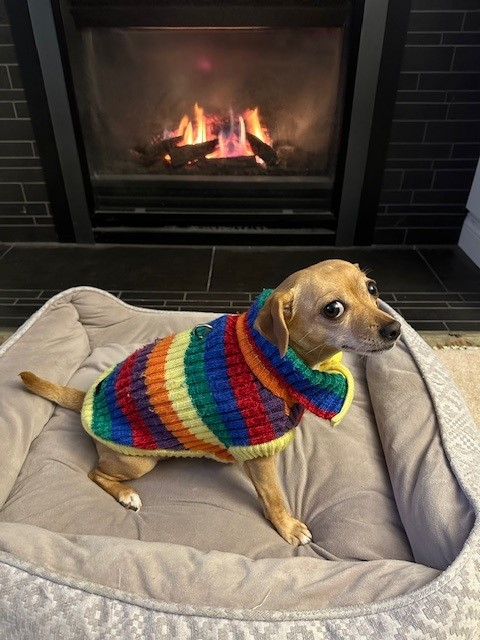

(Actually, she is saying "Why did you dress me up in my outside sweater when there is a nice warm fire for me right here...😃)

</details>

Remember: next week we'll hold office hours in lectures and tutorials.

---